In [1]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-08-06 12:27:39--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [    <=>             ]  22.62M  31.9MB/s    in 0.7s    

2025-08-06 12:27:40 (31.9 MB/s) - ‘online+retail.zip’ saved [23715478]



In [4]:
!unzip online+retail.zip

Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


In [5]:
df1 = pd.read_excel('Online Retail.xlsx', dtype={'InvoiceNo': 'string', 'StockCode': 'string', 'Description': 'string', 'Country': 'string'})
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df1.shape

(541909, 8)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


### Data Cleaning

In [8]:
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [9]:
df1[df1.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [10]:
df1[df1.StockCode=="22139"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,NaN,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,NaN,United Kingdom
7203,537011,22139,<NA>,-5,2010-12-03 15:38:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 13:50:00,4.95,13521.0,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 16:30:00,10.79,NaN,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-12-09 09:38:00,4.95,17001.0,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [11]:
df1[df1.StockCode=="22139"].Description.mode()

,Description
0,RETROSPOT TEA SET CERAMIC 11 PC


In [13]:
most_freq = df1[["StockCode", "Description"]].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,35833P,check,1
4788,21410,COUNTRY COTTAGE DOORSTOP GREEN,1
4789,21412,VINTAGE GOLD TINSEL REEL,1
4790,21414,SCALLOP SHELL SOAP DISH,1


In [14]:
most_freq = most_freq.groupby("StockCode").head()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,35833P,check,1
4788,21410,COUNTRY COTTAGE DOORSTOP GREEN,1
4789,21412,VINTAGE GOLD TINSEL REEL,1
4790,21414,SCALLOP SHELL SOAP DISH,1


In [15]:
# replacing all the null/NAN values with the most occuring description for that particular stockcode
most_freq.columns = ["StockCode", "freq_Description", "count"]
df2 = df1.merge(most_freq, on="StockCode", how="left")
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,CREAM HANGING HEART T-LIGHT HOLDER,9.0
2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,wrongly marked carton 22804,1.0
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,?,1.0
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0


In [16]:
df2['Description'] = df2['freq_Description']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,CREAM HANGING HEART T-LIGHT HOLDER,9.0
2,536365,85123A,wrongly marked carton 22804,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,wrongly marked carton 22804,1.0
3,536365,85123A,?,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,?,1.0
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0


In [17]:
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,169960
Country,0
freq_Description,112
count,112


In [18]:
df2.dropna(subset=["Description"], inplace=True)
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,169848
Country,0
freq_Description,0
count,0


In [19]:
df2.drop(columns=["freq_Description", "count"], inplace=True)
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
2,536365,85123A,wrongly marked carton 22804,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
3,536365,85123A,?,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [20]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,706467.000000,706467,706467.000000,536619.000000
mean,9.648738,2011-07-05 06:42:56.460216576,4.422714,15291.062294
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-29 13:58:00,1.250000,13956.000000
50%,3.000000,2011-07-20 16:12:00,2.100000,15152.000000
75%,10.000000,2011-10-18 17:05:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,194.440614,NaN,84.791321,1709.201583


In [21]:
df2[df2.Quantity<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
196,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
209,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
304,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
305,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
306,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
706116,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
706336,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
706337,C581568,21258,?,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
706338,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [22]:
df2[df2.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
389582,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
389583,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [23]:
df3 = df2[(df2.UnitPrice>0) & (df2.Quantity>0)]
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,689625.000000,689625,689625.000000,524195.000000
mean,10.791301,2011-07-05 10:50:50.372681216,3.883101,15297.763832
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-29 14:35:00,1.250000,13969.000000
50%,4.000000,2011-07-20 16:17:00,2.100000,15159.000000
75%,12.000000,2011-10-19 10:34:00,4.130000,16794.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,137.897438,NaN,31.605752,1708.571783


In [25]:
df3.Quantity.quantile(0.9999)

np.float64(1500.0)

In [27]:
df3[df3.Quantity>1500].head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
6324,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
6459,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
33722,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom


### Feature Engineering

In [28]:
df4 = df3.copy()
df4["TotalPrice"] = df4["Quantity"] * df4["UnitPrice"]
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
2,536365,85123A,wrongly marked carton 22804,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
3,536365,85123A,?,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [29]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 689625 entries, 0 to 706578
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    689625 non-null  string        
 1   StockCode    689625 non-null  string        
 2   Description  689625 non-null  string        
 3   Quantity     689625 non-null  int64         
 4   InvoiceDate  689625 non-null  datetime64[ns]
 5   UnitPrice    689625 non-null  float64       
 6   CustomerID   524195 non-null  float64       
 7   Country      689625 non-null  string        
 8   TotalPrice   689625 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), string(4)
memory usage: 52.6 MB


In [30]:
df4['Month'] = df4['InvoiceDate'].dt.month
df4.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
596058,575631,23370,SET 36 COLOURING PENCILS DOILEY,16,2011-11-10 13:41:00,1.25,15184.0,United Kingdom,20.00,11
461864,567886,23144,ZINC T-LIGHT HOLDER STARS SMALL,24,2011-09-22 15:18:00,0.83,12930.0,United Kingdom,19.92,9
650080,578362,35953,FOLKART STAR CHRISTMAS DECORATIONS,48,2011-11-24 10:39:00,0.39,12913.0,United Kingdom,18.72,11
379788,562558,23275,SET OF 3 HANGING OWLS OLLIE BEAK,6,2011-08-05 16:43:00,1.25,13451.0,United Kingdom,7.50,8
488450,569384,22609,PENS ASSORTED SPACEBALL,36,2011-10-03 16:47:00,0.19,15159.0,United Kingdom,6.84,10


### Visualization and EDA

#### 1. Plotting Monthly Sales

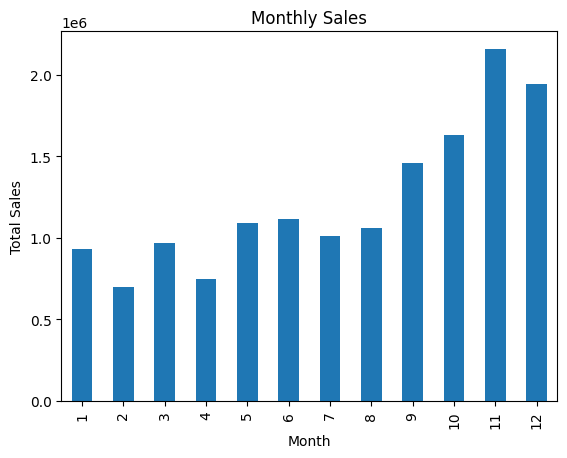

In [32]:
monthly_sales = df4.groupby("Month")["TotalPrice"].sum()
monthly_sales.plot(kind='bar', title="Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

#### total sales started rising up in August having a peek in November, which is likely due to the holiday season at the end of the year.

#### Top 5 countries

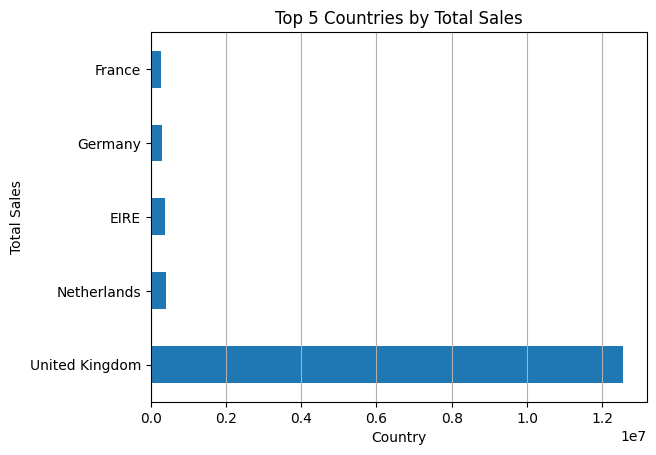

In [36]:
top_5_countries = df4.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(5)
top_5_countries.plot(kind='barh', title="Top 5 Countries by Total Sales")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.grid(axis='x')
plt.show()

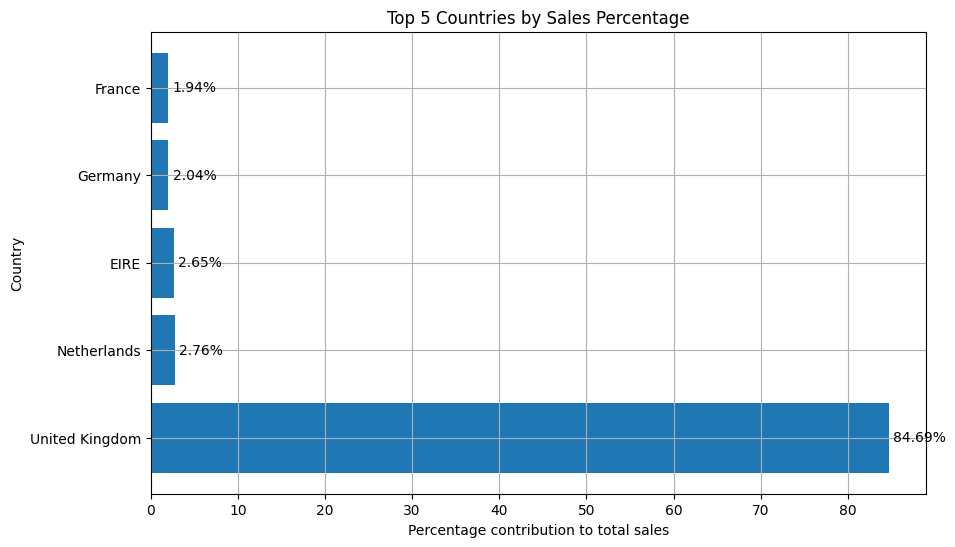

In [37]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

country_wise_sales = df4.groupby('Country')['TotalPrice'].sum()
total_sales = country_wise_sales.sum()

top_5_countries = country_wise_sales.sort_values(ascending=False).head(5)
percentages = (top_5_countries / total_sales) * 100

plt.figure(figsize=(10, 6))
bars = plt.barh(top_5_countries.index, percentages)
plt.xlabel('Percentage contribution to total sales')
plt.ylabel('Country')
plt.title('Top 5 Countries by Sales Percentage')
plt.grid( )
for bar, percentages in zip(bars, percentages):
  plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{percentages:.2f}%', va='center')
plt.show()

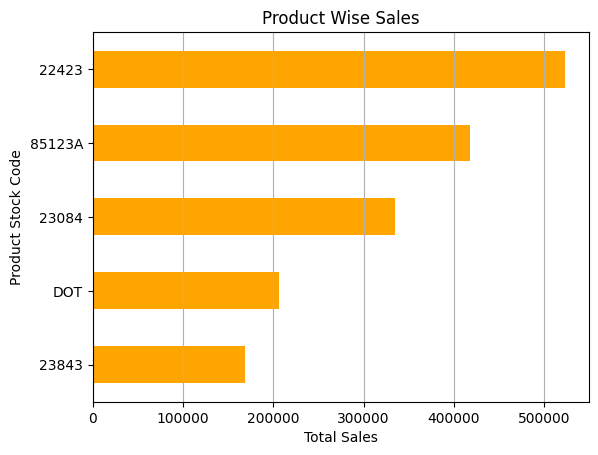

In [41]:
# product wise sales
product_wise_sales = df4.groupby('StockCode')['TotalPrice'].sum()
top_5_products = product_wise_sales.sort_values(ascending=False).head(5)
top_5_products.plot(kind='barh', title="Product Wise Sales", color='orange')
plt.xlabel("Total Sales")
plt.ylabel("Product Stock Code")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

In [42]:
# getting top 5 stock codes
for stock_code in top_5_products.index:
  description = df4[df4.StockCode==stock_code].Description.iloc[0]
  print(f"{stock_code}: {description}")

22423: REGENCY CAKESTAND 3 TIER
85123A: WHITE HANGING HEART T-LIGHT HOLDER
23084: RABBIT NIGHT LIGHT
DOT: DOTCOM POSTAGE
23843: PAPER CRAFT , LITTLE BIRDIE


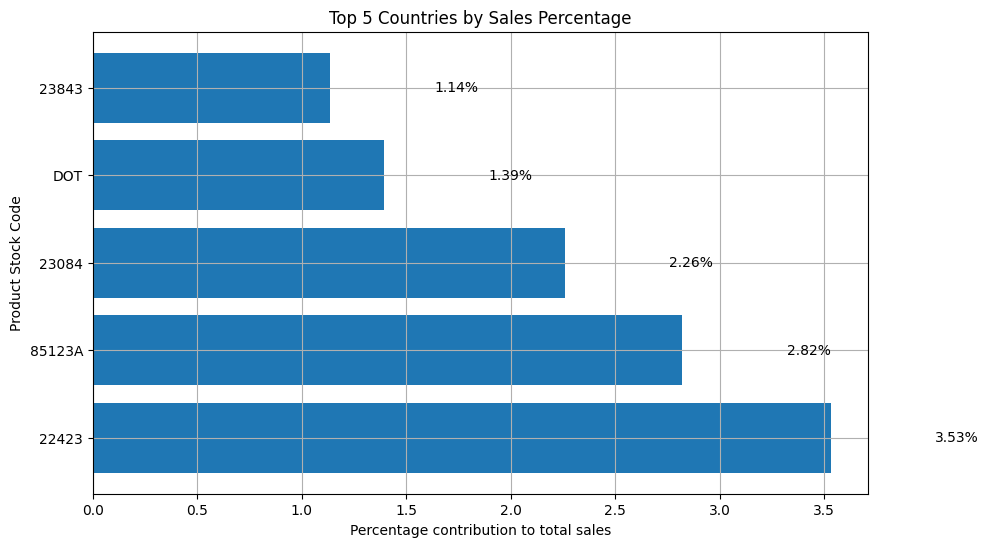

In [43]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

top_sales = product_wise_sales.sum()
percentages = (top_5_products / total_sales) * 100

plt.figure(figsize=(10, 6))
bars = plt.barh(top_5_products.index, percentages)
plt.xlabel('Percentage contribution to total sales')
plt.ylabel('Product Stock Code')
plt.title('Top 5 Countries by Sales Percentage')
plt.grid( )
for bar, percentages in zip(bars, percentages):
  plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{percentages:.2f}%', va='center')
plt.show()

### RFM Analysis (Recency, Frequency, Monetary)

In [44]:
current_date = df4['InvoiceDate'].max() + pd.Timedelta(days=1)
current_date

Timestamp('2011-12-10 12:50:00')

In [46]:
rfm = df4.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,221,5663.53
12348.0,75,34,1930.44
12349.0,19,92,2165.86
12350.0,310,19,364.40


In [47]:
df4[df4.CustomerID==12347]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
19500,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,25.20,12
19501,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,17.00,12
19502,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,39.00,12
19503,537626,71477,COLOURED GLASS STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,39.00,12
19504,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,12347.0,Iceland,23.40,12
...,...,...,...,...,...,...,...,...,...,...
698113,581180,21265,PINK GOOSE FEATHER TREE 60CM,12,2011-12-07 15:52:00,1.95,12347.0,Iceland,23.40,12
698114,581180,23271,CHRISTMAS TABLE SILVER CANDLE SPIKE,16,2011-12-07 15:52:00,0.83,12347.0,Iceland,13.28,12
698115,581180,23271,CHRISTMAS TABLE CANDLE SILVER SPIKE,16,2011-12-07 15:52:00,0.83,12347.0,Iceland,13.28,12
698116,581180,23506,MINI PLAYING CARDS SPACEBOY,20,2011-12-07 15:52:00,0.42,12347.0,Iceland,8.40,12


In [52]:
rfm['R_Segment'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Segment'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_Segment'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])
rfm['RFM_Score'] = rfm[['R_Segment', 'F_Segment', 'M_Segment']].sum(axis=1)
rfm

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,4,6
12347.0,2,221,5663.53,4,4,4,12
12348.0,75,34,1930.44,2,2,3,7
12349.0,19,92,2165.86,3,3,3,9
12350.0,310,19,364.40,1,1,1,3
...,...,...,...,...,...,...,...
18280.0,278,12,211.20,1,1,1,3
18281.0,181,12,160.92,1,1,1,3
18282.0,8,17,269.97,4,1,1,6


In [53]:
# customer with highest rfm score
rfm.sort_values(by='RFM_Score', ascending=False)

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
18198.0,4,209,6873.50,4,4,4,12
18210.0,2,164,3229.30,4,4,4,12
18172.0,15,267,15061.60,4,4,4,12
18241.0,10,152,3138.61,4,4,4,12
18245.0,7,224,3431.96,4,4,4,12
...,...,...,...,...,...,...,...
16344.0,158,4,202.20,1,1,1,3
16338.0,157,15,292.20,1,1,1,3
17578.0,218,5,143.46,1,1,1,3


### Customer Churn Analysis

In [54]:
df4.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,12
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,12


In [55]:
# creating a basket for association rule mining
customer_last_purchase = df4.groupby('CustomerID')['InvoiceDate'].max()
customer_last_purchase.head()

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:01:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00


In [56]:
current_date

Timestamp('2011-12-10 12:50:00')

In [57]:
customer_last_purchase = (current_date - customer_last_purchase).dt.days
customer_last_purchase.head()

,InvoiceDate
CustomerID,
12346.0,326
12347.0,2
12348.0,75
12349.0,19
12350.0,310


In [58]:
# defining the churn threshold
churn_theshold = 90
churned_customers = customer_last_purchase[customer_last_purchase > churn_theshold]
churned_customers.head()

,InvoiceDate
CustomerID,
12346.0,326
12350.0,310
12353.0,204
12354.0,232
12355.0,214


Total number of churned customers: 1449


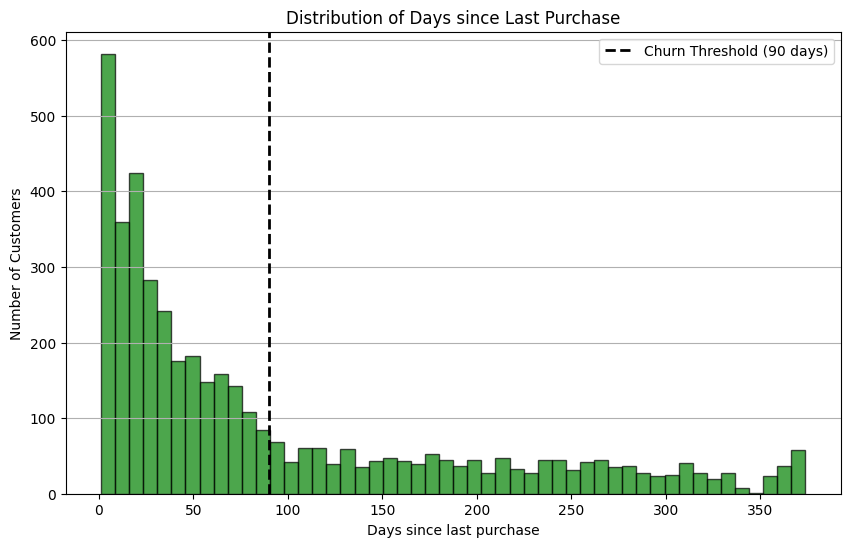

In [60]:
print(f"Total number of churned customers: {len(churned_customers)}")
plt.figure(figsize=(10, 6))
plt.hist(customer_last_purchase, bins=50, color='green', edgecolor='black', alpha=0.7)
plt.axvline(x=churn_theshold, color='black', linestyle='dashed', linewidth=2, label=f'Churn Threshold ({churn_theshold} days)')
plt.xlabel('Days since last purchase')
plt.ylabel('Number of Customers')
plt.title('Distribution of Days since Last Purchase')
plt.legend()
plt.grid(axis='y')
plt.show()

In [61]:
import time
stime = time.time()

In [62]:
print(f"[{pd.__name__}] total time taken: {time.time() - stime} seconds")

[pandas] total time taken: 251.55655479431152 seconds


#### **RFM Analysis (Recency, Frequency, Monetary)** is a data analysis technique used primarily in **marketing and customer segmentation** to evaluate and rank customer behavior based on three key metrics:

---

### 🔹 1. **Recency (R):**

* **What it measures:** How recently a customer made a purchase.
* **Why it matters:** Customers who purchased recently are more likely to respond to promotions or buy again.

---

### 🔹 2. **Frequency (F):**

* **What it measures:** How often a customer makes a purchase in a given time frame.
* **Why it matters:** Frequent buyers are typically more loyal and engaged.

---

### 🔹 3. **Monetary (M):**

* **What it measures:** How much money a customer has spent in total.
* **Why it matters:** High-spending customers are often the most valuable to a business.

---

### ✅ **How RFM Works:**

Each customer is scored on each of the three dimensions:

* Scores are often on a **scale of 1 to 5**, where 5 is best.
* A high **Recency score (5)** means the customer bought something recently.
* A high **Frequency score (5)** means the customer buys often.
* A high **Monetary score (5)** means the customer spends a lot.

For example:

| Customer | Recency | Frequency | Monetary | RFM Score |
| -------- | ------- | --------- | -------- | --------- |
| A        | 5       | 4         | 5        | 545       |
| B        | 1       | 2         | 3        | 123       |

---

### 🧠 **Why Use RFM Analysis?**

It helps businesses:

* Identify **top customers** (e.g., those with high RFM scores).
* Design **targeted marketing campaigns**.
* Reduce **churn** by identifying at-risk customers (low recency).
* Improve **customer retention** and **lifetime value** strategies.

---

### 📊 **Use Case Example:**

An e-commerce business uses RFM analysis to:

* **Reward loyal customers** (high R, F, M).
* **Re-engage dormant customers** (low R).
* **Cross-sell or upsell** to high-frequency buyers.